# 0.0 Importações 

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import scikitplot        as skplt

from imblearn.under_sampling import NearMiss
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score



# 1.0 Análise Descritiva

## 1.1 Lendo CSV

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.columns = [
    'horas', 'tipo', 'valor_transacao', 'cliente_origem', 'saldo_inicial',
    'novo_saldo', 'cliente_destino', 'destino_saldo_antes',
    'destino_saldo_pos', 'fraude', 'fraude_sinalizada'
]

## 1.2 Descrição dos Dados

In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   horas                int64  
 1   tipo                 object 
 2   valor_transacao      float64
 3   cliente_origem       object 
 4   saldo_inicial        float64
 5   novo_saldo           float64
 6   cliente_destino      object 
 7   destino_saldo_antes  float64
 8   destino_saldo_pos    float64
 9   fraude               int64  
 10  fraude_sinalizada    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
horas,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
valor_transacao,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
saldo_inicial,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
novo_saldo,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
destino_saldo_antes,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
destino_saldo_pos,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
fraude,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
fraude_sinalizada,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()

horas                  0
tipo                   0
valor_transacao        0
cliente_origem         0
saldo_inicial          0
novo_saldo             0
cliente_destino        0
destino_saldo_antes    0
destino_saldo_pos      0
fraude                 0
fraude_sinalizada      0
dtype: int64

# 2.0 Feature Enginering 

In [16]:
df1 = df.copy()

## 2.1 Criando novas Variavéis 

In [9]:
df['dias'] = df['horas'].apply(lambda x: x/24)

df['letra_cliente_origem'] = df.loc[0:len(df), 'cliente_origem'].apply(lambda x: x[0])

df['letra_cliente_destino'] = df.loc[0:len(df), 'cliente_destino'].apply(lambda x: x[0])

df['numero_cliente_origem'] = df.loc[0:len(df), 'cliente_origem'].apply(lambda x: len(x))

df['numero_cliente_destino'] = df.loc[0:len(df), 'cliente_destino'].apply(lambda x: len(x))

In [10]:
df['numero_cliente_origem'] = df['numero_cliente_origem'].apply(lambda x: str(x))

df['numero_cliente_destino'] = df['numero_cliente_destino'].apply(lambda x: str(x))

In [11]:
df['dias'] = round(df['dias'])+1

In [12]:
def concatena (colunaA,colunaB):
    c = colunaA + colunaB 
    return c

In [13]:
df['novo_cliente_origem'] = concatena(df['letra_cliente_origem'], df['numero_cliente_origem'])
df['novo_cliente_destino'] = concatena(df['letra_cliente_destino'], df['numero_cliente_destino'])

In [14]:
df.head()

,horas,tipo,valor_transacao,cliente_origem,saldo_inicial,novo_saldo,cliente_destino,destino_saldo_antes,destino_saldo_pos,fraude,fraude_sinalizada,dias,letra_cliente_origem,letra_cliente_destino,numero_cliente_origem,numero_cliente_destino,novo_cliente_origem,novo_cliente_destino
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1.0,C,M,11,11,C11,M11
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1.0,C,M,11,11,C11,M11
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1.0,C,C,11,10,C11,C10
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0,C,C,10,9,C10,C9
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1.0,C,M,11,11,C11,M11


In [15]:
df1 = df.drop(['letra_cliente_origem', 'letra_cliente_destino', 'cliente_origem', 
               'cliente_destino', 'numero_cliente_origem', 'numero_cliente_destino'], axis=1)

In [16]:
df_cat_col = df1.select_dtypes(include='object')
df_num_col = df1.select_dtypes(exclude='object')

In [17]:
df_cat_col.head()

,tipo,novo_cliente_origem,novo_cliente_destino
0,PAYMENT,C11,M11
1,PAYMENT,C11,M11
2,TRANSFER,C11,C10
3,CASH_OUT,C10,C9
4,PAYMENT,C11,M11


In [18]:
df_num_col.head()

,horas,valor_transacao,saldo_inicial,novo_saldo,destino_saldo_antes,destino_saldo_pos,fraude,fraude_sinalizada,dias
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1.0


# 3.0 Análise Exploratória

**Hipotese 1.** As fraudes acontecem 10% mais nos saques.

**Falsa -** As fraudes acontecem iguais no saque e nas transferências.

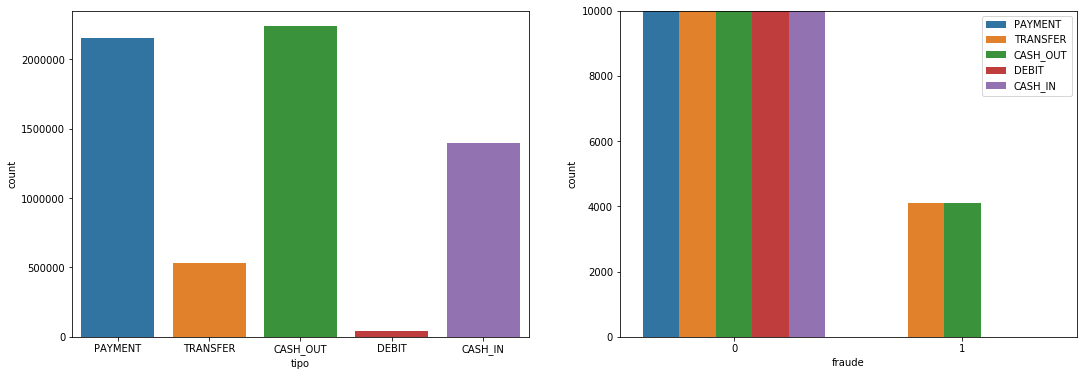

In [19]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='tipo', data=df1)

plt.subplot(1, 2, 2)
plt.ylim(0, 10000)
sns.countplot(x='fraude', hue='tipo', data=df1)
plt.legend(loc=1);

**Hipotese 2.** 90% das fraudes são no primeiro dia.

**Falsa -** A distribuição das fraudes não varia muito conforme os dias.

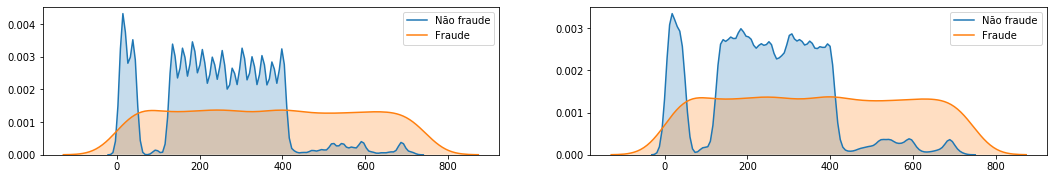

In [20]:
plt.figure(figsize=(18,6))
plt.subplot(2,2,1)
aux1 = df1[(df1['tipo']=='CASH_OUT')]
sns.kdeplot(aux1[aux1['fraude'] == 0]['horas'],label='Não fraude', shade=True)
sns.kdeplot(aux1[aux1['fraude'] == 1]['horas'],label='Fraude', shade=True)

plt.subplot(2,2,2)
aux4 = df1[(df1['tipo']=='TRANSFER')]
sns.kdeplot(aux4[aux4['fraude'] == 0]['horas'],label='Não fraude', shade=True)
sns.kdeplot(aux4[aux4['fraude'] == 1]['horas'],label='Fraude', shade=True);


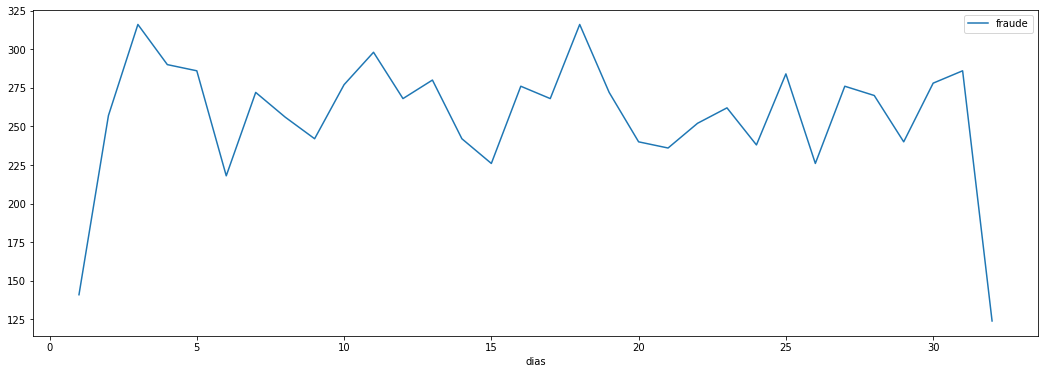

In [21]:
aux1 = df1[['fraude','dias']].groupby('dias').sum()
aux1.plot(figsize=(18, 6))

In [58]:
corr = df2.corr()

In [66]:
corr = round(corr, 2)

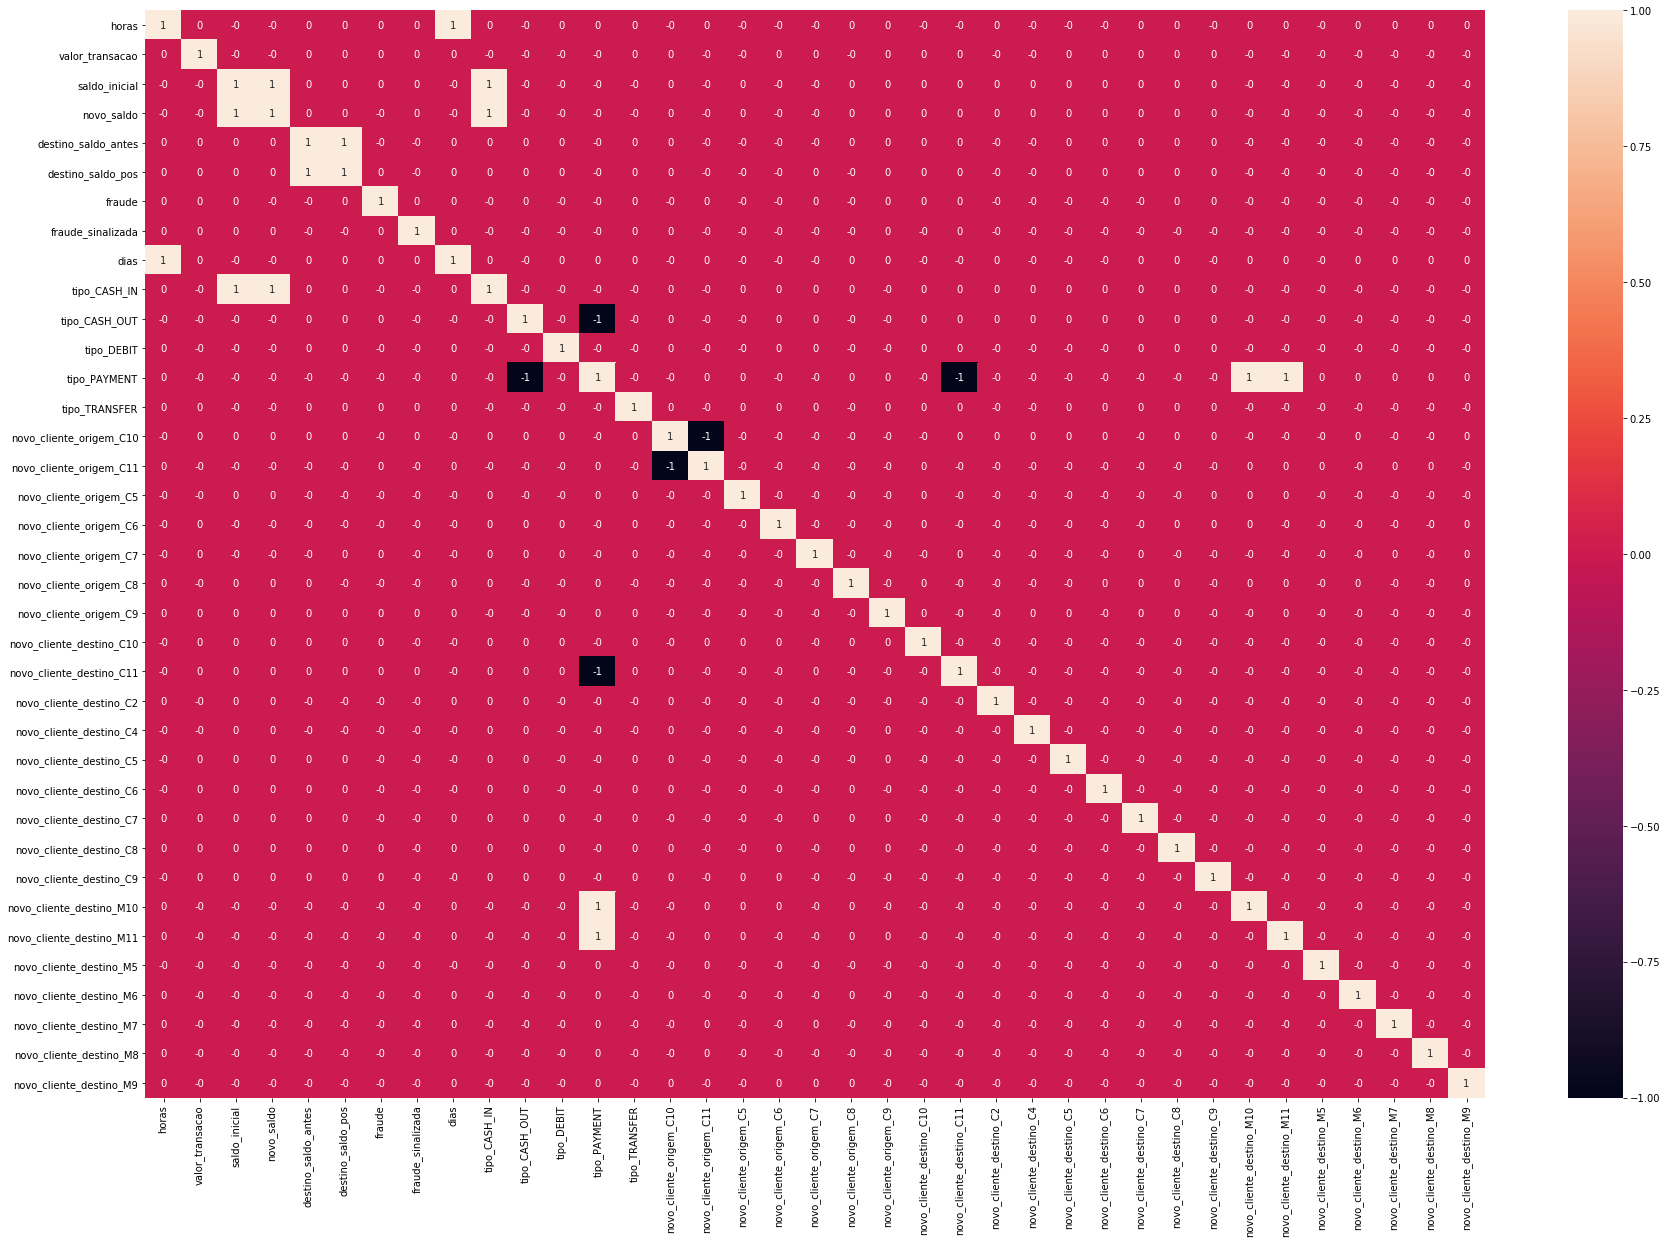

In [67]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [42]:
rl = LogisticRegression(max_iter=100000)

In [26]:
df2 = pd.get_dummies(df1)

In [22]:
nm = NearMiss()

In [27]:
X = df2.drop('fraude', axis=1)

In [28]:
y = df2['fraude']

In [29]:
X, y = nm.fit_sample(X, y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45, stratify=y)

In [48]:
rl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred = rl.predict(X_test)


In [50]:
accuracy_score(y_test, y_pred)

0.9990260530801072

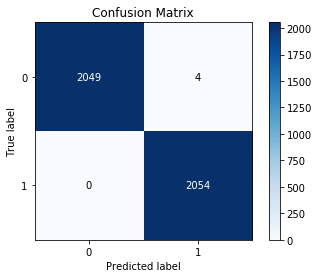

In [51]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [55]:
X.shape

(16426, 36)

In [54]:
y.shape

(16426,)